In [1]:
import cv2 

img = cv2.imread("C:/Users/dante/Downloads/deport/sportimages/sportimages/basket/basket2_0090.jpg")
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

21 28 3 3


# Convolutional Neural Networks

# Importar Librerías

In [3]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [5]:
dirname = os.path.join(os.getcwd(),'/home/likcos/DataSets/sportimages/sportimages')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /home/likcos/DataSets/sportimages/sportimages/
Leyendo...1
/home/likcos/DataSets/sportimages/sportimages/americano 1


Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
Leyendo...11
Leyendo...12
Leyendo...13
Leyendo...14
Leyendo...15
Leyendo...16
Leyendo...17
Leyendo...18
Leyendo...19
Leyendo...20
Leyendo...21
Leyendo...22
Leyendo...23
Leyendo...24
Leyendo...25
Leyendo...26
Leyendo...27
Leyendo...28
Leyendo...29
Leyendo...30
Leyendo...31
Leyendo...32
Leyendo...33
Leyendo...34
Leyendo...35
Leyendo...36
Leyendo...37
Leyendo...38
Leyendo...39
Leyendo...40
Leyendo...41
Leyendo...42
Leyendo...43
Leyendo...44
Leyendo...45
Leyendo...46
Leyendo...47
Leyendo...48
Leyendo...49
Leyendo...50
Leyendo...51
Leyendo...52
Leyendo...53
Leyendo...54
Leyendo...55
Leyendo...56
Leyendo...57
Leyendo...58
Leyendo...59
Leyendo...60
Leyendo...61
Leyendo...62
Leyendo...63
Leyendo...64
Leyendo...65
Leyendo...66
Leyendo...67
Leyendo...68
Leyendo...69
Leyendo...70
Leyendo...71
Leyendo...72
Leyendo...73
Leyendo...74
Leyendo...75
Leyendo...76
Leyendo...77
Leyendo.

Leyendo...1434
Leyendo...1435
Leyendo...1436
Leyendo...1437
Leyendo...1438
Leyendo...1439
Leyendo...1440
Leyendo...1441
Leyendo...1442
Leyendo...1443
Leyendo...1444
Leyendo...1445
Leyendo...1446
Leyendo...1447
Leyendo...1448
Leyendo...1449
Leyendo...1450
Leyendo...1451
Leyendo...1452
Leyendo...1453
Leyendo...1454
Leyendo...1455
Leyendo...1456
Leyendo...1457
Leyendo...1458
Leyendo...1459
Leyendo...1460
Leyendo...1461
Leyendo...1462
Leyendo...1463
Leyendo...1464
Leyendo...1465
Leyendo...1466
Leyendo...1467
Leyendo...1468
Leyendo...1469
Leyendo...1470
Leyendo...1471
Leyendo...1472
Leyendo...1473
Leyendo...1474
Leyendo...1475
Leyendo...1476
Leyendo...1477
Leyendo...1478
Leyendo...1479
Leyendo...1480
Leyendo...1481
Leyendo...1482
Leyendo...1483
Leyendo...1484
Leyendo...1485
Leyendo...1486
Leyendo...1487
Leyendo...1488
Leyendo...1489
Leyendo...1490
Leyendo...1491
Leyendo...1492
Leyendo...1493
Leyendo...1494
Leyendo...1495
Leyendo...1496
Leyendo...1497
Leyendo...1498
Leyendo...1499
Leyendo...

Leyendo...2112
Leyendo...2113
Leyendo...2114
Leyendo...2115
Leyendo...2116
Leyendo...2117
Leyendo...2118
Leyendo...2119
Leyendo...2120
Leyendo...2121
Leyendo...2122
Leyendo...2123
Leyendo...2124
Leyendo...2125
Leyendo...2126
Leyendo...2127
Leyendo...2128
Leyendo...2129
Leyendo...2130
Leyendo...2131
Leyendo...2132
Leyendo...2133
Leyendo...2134
Leyendo...2135
Leyendo...2136
Leyendo...2137
Leyendo...2138
Leyendo...2139
Leyendo...2140
Leyendo...2141
Leyendo...2142
Leyendo...2143
Leyendo...2144
Leyendo...2145
Leyendo...2146
Leyendo...2147
Leyendo...2148
Leyendo...2149
Leyendo...2150
Leyendo...2151
Leyendo...2152
Leyendo...2153
Leyendo...2154
Leyendo...2155
Leyendo...2156
Leyendo...2157
Leyendo...2158
Leyendo...2159
Leyendo...2160
Leyendo...2161
Leyendo...2162
Leyendo...2163
Leyendo...2164
Leyendo...2165
Leyendo...2166
Leyendo...2167
Leyendo...2168
Leyendo...2169
Leyendo...2170
Leyendo...2171
Leyendo...2172
Leyendo...2173
Leyendo...2174
Leyendo...2175
Leyendo...2176
Leyendo...2177
Leyendo...

Leyendo...2864
Leyendo...2865
Leyendo...2866
Leyendo...2867
Leyendo...2868
Leyendo...2869
Leyendo...2870
Leyendo...2871
Leyendo...2872
Leyendo...2873
Leyendo...2874
Leyendo...2875
Leyendo...2876
Leyendo...2877
Leyendo...2878
Leyendo...2879
Leyendo...2880
Leyendo...2881
Leyendo...2882
Leyendo...2883
Leyendo...2884
Leyendo...2885
Leyendo...2886
Leyendo...2887
Leyendo...2888
Leyendo...2889
Leyendo...2890
Leyendo...2891
Leyendo...2892
Leyendo...2893
Leyendo...2894
Leyendo...2895
Leyendo...2896
Leyendo...2897
Leyendo...2898
Leyendo...2899
Leyendo...2900
Leyendo...2901
Leyendo...2902
Leyendo...2903
Leyendo...2904
Leyendo...2905
Leyendo...2906
Leyendo...2907
Leyendo...2908
Leyendo...2909
Leyendo...2910
Leyendo...2911
Leyendo...2912
Leyendo...2913
Leyendo...2914
Leyendo...2915
Leyendo...2916
Leyendo...2917
Leyendo...2918
Leyendo...2919
Leyendo...2920
Leyendo...2921
Leyendo...2922
Leyendo...2923
Leyendo...2924
Leyendo...2925
Leyendo...2926
Leyendo...2927
Leyendo...2928
Leyendo...2929
Leyendo...

Leyendo...3532
Leyendo...3533
Leyendo...3534
Leyendo...3535
Leyendo...3536
Leyendo...3537
Leyendo...3538
Leyendo...3539
Leyendo...3540
Leyendo...3541
Leyendo...3542
Leyendo...3543
Leyendo...3544
Leyendo...3545
Leyendo...3546
Leyendo...3547
Leyendo...3548
Leyendo...3549
Leyendo...3550
Leyendo...3551
Leyendo...3552
Leyendo...3553
Leyendo...3554
Leyendo...3555
Leyendo...3556
Leyendo...3557
Leyendo...3558
Leyendo...3559
Leyendo...3560
Leyendo...3561
Leyendo...3562
Leyendo...3563
Leyendo...3564
Leyendo...3565
Leyendo...3566
Leyendo...3567
Leyendo...3568
Leyendo...3569
Leyendo...3570
Leyendo...3571
Leyendo...3572
Leyendo...3573
Leyendo...3574
Leyendo...3575
Leyendo...3576
Leyendo...3577
Leyendo...3578
Leyendo...3579
Leyendo...3580
Leyendo...3581
Leyendo...3582
Leyendo...3583
Leyendo...3584
Leyendo...3585
Leyendo...3586
Leyendo...3587
Leyendo...3588
Leyendo...3589
Leyendo...3590
Leyendo...3591
Leyendo...3592
Leyendo...3593
Leyendo...3594
Leyendo...3595
Leyendo...3596
Leyendo...3597
Leyendo...

Leyendo...4262
Leyendo...4263
Leyendo...4264
Leyendo...4265
Leyendo...4266
Leyendo...4267
Leyendo...4268
Leyendo...4269
Leyendo...4270
Leyendo...4271
Leyendo...4272
Leyendo...4273
Leyendo...4274
Leyendo...4275
Leyendo...4276
Leyendo...4277
Leyendo...4278
Leyendo...4279
Leyendo...4280
Leyendo...4281
Leyendo...4282
Leyendo...4283
Leyendo...4284
Leyendo...4285
Leyendo...4286
Leyendo...4287
Leyendo...4288
Leyendo...4289
Leyendo...4290
Leyendo...4291
Leyendo...4292
Leyendo...4293
Leyendo...4294
Leyendo...4295
Leyendo...4296
Leyendo...4297
Leyendo...4298
Leyendo...4299
Leyendo...4300
Leyendo...4301
Leyendo...4302
Leyendo...4303
Leyendo...4304
Leyendo...4305
Leyendo...4306
Leyendo...4307
Leyendo...4308
Leyendo...4309
Leyendo...4310
Leyendo...4311
Leyendo...4312
Leyendo...4313
Leyendo...4314
Leyendo...4315
Leyendo...4316
Leyendo...4317
Leyendo...4318
Leyendo...4319
Leyendo...4320
Leyendo...4321
Leyendo...4322
Leyendo...4323
Leyendo...4324
Leyendo...4325
Leyendo...4326
Leyendo...4327
Leyendo...

Leyendo...5034
Leyendo...5035
Leyendo...5036
Leyendo...5037
Leyendo...5038
Leyendo...5039
Leyendo...5040
Leyendo...5041
Leyendo...5042
Leyendo...5043
Leyendo...5044
Leyendo...5045
Leyendo...5046
Leyendo...5047
Leyendo...5048
Leyendo...5049
Leyendo...5050
Leyendo...5051
Leyendo...5052
Leyendo...5053
Leyendo...5054
Leyendo...5055
Leyendo...5056
Leyendo...5057
Leyendo...5058
Leyendo...5059
Leyendo...5060
Leyendo...5061
Leyendo...5062
Leyendo...5063
Leyendo...5064
Leyendo...5065
Leyendo...5066
Leyendo...5067
Leyendo...5068
Leyendo...5069
Leyendo...5070
Leyendo...5071
Leyendo...5072
Leyendo...5073
Leyendo...5074
Leyendo...5075
Leyendo...5076
Leyendo...5077
Leyendo...5078
Leyendo...5079
Leyendo...5080
Leyendo...5081
Leyendo...5082
Leyendo...5083
Leyendo...5084
Leyendo...5085
Leyendo...5086
Leyendo...5087
Leyendo...5088
Leyendo...5089
Leyendo...5090
Leyendo...5091
Leyendo...5092
Leyendo...5093
Leyendo...5094
Leyendo...5095
Leyendo...5096
Leyendo...5097
Leyendo...5098
Leyendo...5099
Leyendo...

Leyendo...5798
Leyendo...5799
Leyendo...5800
Leyendo...5801
Leyendo...5802
Leyendo...5803
Leyendo...5804
Leyendo...5805
Leyendo...5806
Leyendo...5807
Leyendo...5808
Leyendo...5809
Leyendo...5810
Leyendo...5811
Leyendo...5812
Leyendo...5813
Leyendo...5814
Leyendo...5815
Leyendo...5816
Leyendo...5817
Leyendo...5818
Leyendo...5819
Leyendo...5820
Leyendo...5821
Leyendo...5822
Leyendo...5823
Leyendo...5824
Leyendo...5825
Leyendo...5826
Leyendo...5827
Leyendo...5828
Leyendo...5829
Leyendo...5830
Leyendo...5831
Leyendo...5832
Leyendo...5833
Leyendo...5834
Leyendo...5835
Leyendo...5836
Leyendo...5837
Leyendo...5838
Leyendo...5839
Leyendo...5840
Leyendo...5841
Leyendo...5842
Leyendo...5843
Leyendo...5844
Leyendo...5845
Leyendo...5846
Leyendo...5847
Leyendo...5848
Leyendo...5849
Leyendo...5850
Leyendo...5851
Leyendo...5852
Leyendo...5853
Leyendo...5854
Leyendo...5855
Leyendo...5856
Leyendo...5857
Leyendo...5858
Leyendo...5859
Leyendo...5860
Leyendo...5861
Leyendo...5862
Leyendo...5863
Leyendo...

Leyendo...6491
Leyendo...6492
Leyendo...6493
Leyendo...6494
Leyendo...6495
Leyendo...6496
Leyendo...6497
Leyendo...6498
Leyendo...6499
Leyendo...6500
Leyendo...6501
Leyendo...6502
Leyendo...6503
Leyendo...6504
Leyendo...6505
Leyendo...6506
Leyendo...6507
Leyendo...6508
Leyendo...6509
Leyendo...6510
Leyendo...6511
Leyendo...6512
Leyendo...6513
Leyendo...6514
Leyendo...6515
Leyendo...6516
Leyendo...6517
Leyendo...6518
Leyendo...6519
Leyendo...6520
Leyendo...6521
Leyendo...6522
Leyendo...6523
Leyendo...6524
Leyendo...6525
Leyendo...6526
Leyendo...6527
Leyendo...6528
Leyendo...6529
Leyendo...6530
Leyendo...6531
Leyendo...6532
Leyendo...6533
Leyendo...6534
Leyendo...6535
Leyendo...6536
Leyendo...6537
Leyendo...6538
Leyendo...6539
Leyendo...6540
Leyendo...6541
Leyendo...6542
Leyendo...6543
Leyendo...6544
Leyendo...6545
Leyendo...6546
Leyendo...6547
Leyendo...6548
Leyendo...6549
Leyendo...6550
Leyendo...6551
Leyendo...6552
Leyendo...6553
Leyendo...6554
Leyendo...6555
Leyendo...6556
Leyendo...

Leyendo...7288
Leyendo...7289
Leyendo...7290
Leyendo...7291
Leyendo...7292
Leyendo...7293
Leyendo...7294
Leyendo...7295
Leyendo...7296
Leyendo...7297
Leyendo...7298
Leyendo...7299
Leyendo...7300
Leyendo...7301
Leyendo...7302
Leyendo...7303
Leyendo...7304
Leyendo...7305
Leyendo...7306
Leyendo...7307
Leyendo...7308
Leyendo...7309
Leyendo...7310
Leyendo...7311
Leyendo...7312
Leyendo...7313
Leyendo...7314
Leyendo...7315
Leyendo...7316
Leyendo...7317
Leyendo...7318
Leyendo...7319
Leyendo...7320
Leyendo...7321
Leyendo...7322
Leyendo...7323
Leyendo...7324
Leyendo...7325
Leyendo...7326
Leyendo...7327
Leyendo...7328
Leyendo...7329
Leyendo...7330
Leyendo...7331
Leyendo...7332
Leyendo...7333
Leyendo...7334
Leyendo...7335
Leyendo...7336
Leyendo...7337
Leyendo...7338
Leyendo...7339
Leyendo...7340
Leyendo...7341
Leyendo...7342
Leyendo...7343
Leyendo...7344
Leyendo...7345
Leyendo...7346
Leyendo...7347
Leyendo...7348
Leyendo...7349
Leyendo...7350
Leyendo...7351
Leyendo...7352
Leyendo...7353
Leyendo...

Leyendo...8006
Leyendo...8007
Leyendo...8008
Leyendo...8009
Leyendo...8010
Leyendo...8011
Leyendo...8012
Leyendo...8013
Leyendo...8014
Leyendo...8015
Leyendo...8016
Leyendo...8017
Leyendo...8018
Leyendo...8019
Leyendo...8020
Leyendo...8021
Leyendo...8022
Leyendo...8023
Leyendo...8024
Leyendo...8025
Leyendo...8026
Leyendo...8027
Leyendo...8028
Leyendo...8029
Leyendo...8030
Leyendo...8031
Leyendo...8032
Leyendo...8033
Leyendo...8034
Leyendo...8035
Leyendo...8036
Leyendo...8037
Leyendo...8038
Leyendo...8039
Leyendo...8040
Leyendo...8041
Leyendo...8042
Leyendo...8043
Leyendo...8044
Leyendo...8045
Leyendo...8046
Leyendo...8047
Leyendo...8048
Leyendo...8049
Leyendo...8050
Leyendo...8051
Leyendo...8052
Leyendo...8053
Leyendo...8054
Leyendo...8055
Leyendo...8056
Leyendo...8057
Leyendo...8058
Leyendo...8059
Leyendo...8060
Leyendo...8061
Leyendo...8062
Leyendo...8063
Leyendo...8064
Leyendo...8065
Leyendo...8066
Leyendo...8067
Leyendo...8068
Leyendo...8069
Leyendo...8070
Leyendo...8071
Leyendo...

Leyendo...8744
Leyendo...8745
Leyendo...8746
Leyendo...8747
Leyendo...8748
Leyendo...8749
Leyendo...8750
Leyendo...8751
Leyendo...8752
Leyendo...8753
Leyendo...8754
Leyendo...8755
Leyendo...8756
Leyendo...8757
Leyendo...8758
Leyendo...8759
Leyendo...8760
Leyendo...8761
Leyendo...8762
Leyendo...8763
Leyendo...8764
Leyendo...8765
Leyendo...8766
Leyendo...8767
Leyendo...8768
Leyendo...8769
Leyendo...8770
Leyendo...8771
Leyendo...8772
Leyendo...8773
Leyendo...8774
Leyendo...8775
Leyendo...8776
Leyendo...8777
Leyendo...8778
Leyendo...8779
Leyendo...8780
Leyendo...8781
Leyendo...8782
Leyendo...8783
Leyendo...8784
Leyendo...8785
Leyendo...8786
Leyendo...8787
Leyendo...8788
Leyendo...8789
Leyendo...8790
Leyendo...8791
Leyendo...8792
Leyendo...8793
Leyendo...8794
Leyendo...8795
Leyendo...8796
Leyendo...8797
Leyendo...8798
Leyendo...8799
Leyendo...8800
Leyendo...8801
Leyendo...8802
Leyendo...8803
Leyendo...8804
Leyendo...8805
Leyendo...8806
Leyendo...8807
Leyendo...8808
Leyendo...8809
Leyendo...

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
Leyendo...11
Leyendo...12
Leyendo...13
Leyendo...14
Leyendo...15
Leyendo...16
Leyendo...17
Leyendo...18
Leyendo...19
Leyendo...20
Leyendo...21
Leyendo...22
Leyendo...23
Leyendo...24
Leyendo...25
Leyendo...26
Leyendo...27
Leyendo...28
Leyendo...29
Leyendo...30
Leyendo...31
Leyendo...32
Leyendo...33
Leyendo...34
Leyendo...35
Leyendo...36
Leyendo...37
Leyendo...38
Leyendo...39
Leyendo...40
Leyendo...41
Leyendo...42
Leyendo...43
Leyendo...44
Leyendo...45
Leyendo...46
Leyendo...47
Leyendo...48
Leyendo...49
Leyendo...50
Leyendo...51
Leyendo...52
Leyendo...53
Leyendo...54
Leyendo...55
Leyendo...56
Leyendo...57
Leyendo...58
Leyendo...59
Leyendo...60
Leyendo...61
Leyendo...62
Leyendo...63
Leyendo...64
Leyendo...65
Leyendo...66
Leyendo...67
Leyendo...68
Leyendo...69
Leyendo...70
Leyendo...71
Leyendo...72
Leyendo...73
Leyendo...74
Leyendo...75
Leyendo...76
Leyendo...77
Leyendo.

Leyendo...898
Leyendo...899
Leyendo...900
Leyendo...901
Leyendo...902
Leyendo...903
Leyendo...904
Leyendo...905
Leyendo...906
Leyendo...907
Leyendo...908
Leyendo...909
Leyendo...910
Leyendo...911
Leyendo...912
Leyendo...913
Leyendo...914
Leyendo...915
Leyendo...916
Leyendo...917
Leyendo...918
Leyendo...919
Leyendo...920
Leyendo...921
Leyendo...922
Leyendo...923
Leyendo...924
Leyendo...925
Leyendo...926
Leyendo...927
Leyendo...928
Leyendo...929
Leyendo...930
Leyendo...931
Leyendo...932
Leyendo...933
Leyendo...934
Leyendo...935
Leyendo...936
Leyendo...937
Leyendo...938
Leyendo...939
Leyendo...940
Leyendo...941
Leyendo...942
Leyendo...943
Leyendo...944
Leyendo...945
Leyendo...946
Leyendo...947
Leyendo...948
Leyendo...949
Leyendo...950
Leyendo...951
Leyendo...952
Leyendo...953
Leyendo...954
Leyendo...955
Leyendo...956
Leyendo...957
Leyendo...958
Leyendo...959
Leyendo...960
Leyendo...961
Leyendo...962
Leyendo...963
Leyendo...964
Leyendo...965
Leyendo...966
Leyendo...967
Leyendo...968
Leyend

Leyendo...1687
Leyendo...1688
Leyendo...1689
Leyendo...1690
Leyendo...1691
Leyendo...1692
Leyendo...1693
Leyendo...1694
Leyendo...1695
Leyendo...1696
Leyendo...1697
Leyendo...1698
Leyendo...1699
Leyendo...1700
Leyendo...1701
Leyendo...1702
Leyendo...1703
Leyendo...1704
Leyendo...1705
Leyendo...1706
Leyendo...1707
Leyendo...1708
Leyendo...1709
Leyendo...1710
Leyendo...1711
Leyendo...1712
Leyendo...1713
Leyendo...1714
Leyendo...1715
Leyendo...1716
Leyendo...1717
Leyendo...1718
Leyendo...1719
Leyendo...1720
Leyendo...1721
Leyendo...1722
Leyendo...1723
Leyendo...1724
Leyendo...1725
Leyendo...1726
Leyendo...1727
Leyendo...1728
Leyendo...1729
Leyendo...1730
Leyendo...1731
Leyendo...1732
Leyendo...1733
Leyendo...1734
Leyendo...1735
Leyendo...1736
Leyendo...1737
Leyendo...1738
Leyendo...1739
Leyendo...1740
Leyendo...1741
Leyendo...1742
Leyendo...1743
Leyendo...1744
Leyendo...1745
Leyendo...1746
Leyendo...1747
Leyendo...1748
Leyendo...1749
Leyendo...1750
Leyendo...1751
Leyendo...1752
Leyendo...

Leyendo...2356
Leyendo...2357
Leyendo...2358
Leyendo...2359
Leyendo...2360
Leyendo...2361
Leyendo...2362
Leyendo...2363
Leyendo...2364
Leyendo...2365
Leyendo...2366
Leyendo...2367
Leyendo...2368
Leyendo...2369
Leyendo...2370
Leyendo...2371
Leyendo...2372
Leyendo...2373
Leyendo...2374
Leyendo...2375
Leyendo...2376
Leyendo...2377
Leyendo...2378
Leyendo...2379
Leyendo...2380
Leyendo...2381
Leyendo...2382
Leyendo...2383
Leyendo...2384
Leyendo...2385
Leyendo...2386
Leyendo...2387
Leyendo...2388
Leyendo...2389
Leyendo...2390
Leyendo...2391
Leyendo...2392
Leyendo...2393
Leyendo...2394
Leyendo...2395
Leyendo...2396
Leyendo...2397
Leyendo...2398
Leyendo...2399
Leyendo...2400
Leyendo...2401
Leyendo...2402
Leyendo...2403
Leyendo...2404
Leyendo...2405
Leyendo...2406
Leyendo...2407
Leyendo...2408
Leyendo...2409
Leyendo...2410
Leyendo...2411
Leyendo...2412
Leyendo...2413
Leyendo...2414
Leyendo...2415
Leyendo...2416
Leyendo...2417
Leyendo...2418
Leyendo...2419
Leyendo...2420
Leyendo...2421
Leyendo...

Leyendo...3106
Leyendo...3107
Leyendo...3108
Leyendo...3109
Leyendo...3110
Leyendo...3111
Leyendo...3112
Leyendo...3113
Leyendo...3114
Leyendo...3115
Leyendo...3116
Leyendo...3117
Leyendo...3118
Leyendo...3119
Leyendo...3120
Leyendo...3121
Leyendo...3122
Leyendo...3123
Leyendo...3124
Leyendo...3125
Leyendo...3126
Leyendo...3127
Leyendo...3128
Leyendo...3129
Leyendo...3130
Leyendo...3131
Leyendo...3132
Leyendo...3133
Leyendo...3134
Leyendo...3135
Leyendo...3136
Leyendo...3137
Leyendo...3138
Leyendo...3139
Leyendo...3140
Leyendo...3141
Leyendo...3142
Leyendo...3143
Leyendo...3144
Leyendo...3145
Leyendo...3146
Leyendo...3147
Leyendo...3148
Leyendo...3149
Leyendo...3150
Leyendo...3151
Leyendo...3152
Leyendo...3153
Leyendo...3154
Leyendo...3155
Leyendo...3156
Leyendo...3157
Leyendo...3158
Leyendo...3159
Leyendo...3160
Leyendo...3161
Leyendo...3162
Leyendo...3163
Leyendo...3164
Leyendo...3165
Leyendo...3166
Leyendo...3167
Leyendo...3168
Leyendo...3169
Leyendo...3170
Leyendo...3171
Leyendo...

Leyendo...3877
Leyendo...3878
Leyendo...3879
Leyendo...3880
Leyendo...3881
Leyendo...3882
Leyendo...3883
Leyendo...3884
Leyendo...3885
Leyendo...3886
Leyendo...3887
Leyendo...3888
Leyendo...3889
Leyendo...3890
Leyendo...3891
Leyendo...3892
Leyendo...3893
Leyendo...3894
Leyendo...3895
Leyendo...3896
Leyendo...3897
Leyendo...3898
Leyendo...3899
Leyendo...3900
Leyendo...3901
Leyendo...3902
Leyendo...3903
Leyendo...3904
Leyendo...3905
Leyendo...3906
Leyendo...3907
Leyendo...3908
Leyendo...3909
Leyendo...3910
Leyendo...3911
Leyendo...3912
Leyendo...3913
Leyendo...3914
Leyendo...3915
Leyendo...3916
Leyendo...3917
Leyendo...3918
Leyendo...3919
Leyendo...3920
Leyendo...3921
Leyendo...3922
Leyendo...3923
Leyendo...3924
Leyendo...3925
Leyendo...3926
Leyendo...3927
Leyendo...3928
Leyendo...3929
Leyendo...3930
Leyendo...3931
Leyendo...3932
Leyendo...3933
Leyendo...3934
Leyendo...3935
Leyendo...3936
Leyendo...3937
Leyendo...3938
Leyendo...3939
Leyendo...3940
Leyendo...3941
Leyendo...3942
Leyendo...

Leyendo...4642
Leyendo...4643
Leyendo...4644
Leyendo...4645
Leyendo...4646
Leyendo...4647
Leyendo...4648
Leyendo...4649
Leyendo...4650
Leyendo...4651
Leyendo...4652
Leyendo...4653
Leyendo...4654
Leyendo...4655
Leyendo...4656
Leyendo...4657
Leyendo...4658
Leyendo...4659
Leyendo...4660
Leyendo...4661
Leyendo...4662
Leyendo...4663
Leyendo...4664
Leyendo...4665
Leyendo...4666
Leyendo...4667
Leyendo...4668
Leyendo...4669
Leyendo...4670
Leyendo...4671
Leyendo...4672
Leyendo...4673
Leyendo...4674
Leyendo...4675
Leyendo...4676
Leyendo...4677
Leyendo...4678
Leyendo...4679
Leyendo...4680
Leyendo...4681
Leyendo...4682
Leyendo...4683
Leyendo...4684
Leyendo...4685
Leyendo...4686
Leyendo...4687
Leyendo...4688
Leyendo...4689
Leyendo...4690
Leyendo...4691
Leyendo...4692
Leyendo...4693
Leyendo...4694
Leyendo...4695
Leyendo...4696
Leyendo...4697
Leyendo...4698
Leyendo...4699
Leyendo...4700
Leyendo...4701
Leyendo...4702
Leyendo...4703
Leyendo...4704
Leyendo...4705
Leyendo...4706
Leyendo...4707
Leyendo...

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
Leyendo...11
Leyendo...12
Leyendo...13
Leyendo...14
Leyendo...15
Leyendo...16
Leyendo...17
Leyendo...18
Leyendo...19
Leyendo...20
Leyendo...21
Leyendo...22
Leyendo...23
Leyendo...24
Leyendo...25
Leyendo...26
Leyendo...27
Leyendo...28
Leyendo...29
Leyendo...30
Leyendo...31
Leyendo...32
Leyendo...33
Leyendo...34
Leyendo...35
Leyendo...36
Leyendo...37
Leyendo...38
Leyendo...39
Leyendo...40
Leyendo...41
Leyendo...42
Leyendo...43
Leyendo...44
Leyendo...45
Leyendo...46
Leyendo...47
Leyendo...48
Leyendo...49
Leyendo...50
Leyendo...51
Leyendo...52
Leyendo...53
Leyendo...54
Leyendo...55
Leyendo...56
Leyendo...57
Leyendo...58
Leyendo...59
Leyendo...60
Leyendo...61
Leyendo...62
Leyendo...63
Leyendo...64
Leyendo...65
Leyendo...66
Leyendo...67
Leyendo...68
Leyendo...69
Leyendo...70
Leyendo...71
Leyendo...72
Leyendo...73
Leyendo...74
Leyendo...75
Leyendo...76
Leyendo...77
Leyendo.

Leyendo...963
Leyendo...964
Leyendo...965
Leyendo...966
Leyendo...967
Leyendo...968
Leyendo...969
Leyendo...970
Leyendo...971
Leyendo...972
Leyendo...973
Leyendo...974
Leyendo...975
Leyendo...976
Leyendo...977
Leyendo...978
Leyendo...979
Leyendo...980
Leyendo...981
Leyendo...982
Leyendo...983
Leyendo...984
Leyendo...985
Leyendo...986
Leyendo...987
Leyendo...988
Leyendo...989
Leyendo...990
Leyendo...991
Leyendo...992
Leyendo...993
Leyendo...994
Leyendo...995
Leyendo...996
Leyendo...997
Leyendo...998
Leyendo...999
Leyendo...1000
Leyendo...1001
Leyendo...1002
Leyendo...1003
Leyendo...1004
Leyendo...1005
Leyendo...1006
Leyendo...1007
Leyendo...1008
Leyendo...1009
Leyendo...1010
Leyendo...1011
Leyendo...1012
Leyendo...1013
Leyendo...1014
Leyendo...1015
Leyendo...1016
Leyendo...1017
Leyendo...1018
Leyendo...1019
Leyendo...1020
Leyendo...1021
Leyendo...1022
Leyendo...1023
Leyendo...1024
Leyendo...1025
Leyendo...1026
Leyendo...1027
Leyendo...1028
Leyendo...1029
Leyendo...1030
Leyendo...1031
Le

Leyendo...1737
Leyendo...1738
Leyendo...1739
Leyendo...1740
Leyendo...1741
Leyendo...1742
Leyendo...1743
Leyendo...1744
Leyendo...1745
Leyendo...1746
Leyendo...1747
Leyendo...1748
Leyendo...1749
Leyendo...1750
Leyendo...1751
Leyendo...1752
Leyendo...1753
Leyendo...1754
Leyendo...1755
Leyendo...1756
Leyendo...1757
Leyendo...1758
Leyendo...1759
Leyendo...1760
Leyendo...1761
Leyendo...1762
Leyendo...1763
Leyendo...1764
Leyendo...1765
Leyendo...1766
Leyendo...1767
Leyendo...1768
Leyendo...1769
Leyendo...1770
Leyendo...1771
Leyendo...1772
Leyendo...1773
Leyendo...1774
Leyendo...1775
Leyendo...1776
Leyendo...1777
Leyendo...1778
Leyendo...1779
Leyendo...1780
Leyendo...1781
Leyendo...1782
Leyendo...1783
Leyendo...1784
Leyendo...1785
Leyendo...1786
Leyendo...1787
Leyendo...1788
Leyendo...1789
Leyendo...1790
Leyendo...1791
Leyendo...1792
Leyendo...1793
Leyendo...1794
Leyendo...1795
Leyendo...1796
Leyendo...1797
Leyendo...1798
Leyendo...1799
Leyendo...1800
Leyendo...1801
Leyendo...1802
Leyendo...

Leyendo...2515
Leyendo...2516
Leyendo...2517
Leyendo...2518
Leyendo...2519
Leyendo...2520
Leyendo...2521
Leyendo...2522
Leyendo...2523
Leyendo...2524
Leyendo...2525
Leyendo...2526
Leyendo...2527
Leyendo...2528
Leyendo...2529
Leyendo...2530
Leyendo...2531
Leyendo...2532
Leyendo...2533
Leyendo...2534
Leyendo...2535
Leyendo...2536
Leyendo...2537
Leyendo...2538
Leyendo...2539
Leyendo...2540
Leyendo...2541
Leyendo...2542
Leyendo...2543
Leyendo...2544
Leyendo...2545
Leyendo...2546
Leyendo...2547
Leyendo...2548
Leyendo...2549
Leyendo...2550
Leyendo...2551
Leyendo...2552
Leyendo...2553
Leyendo...2554
Leyendo...2555
Leyendo...2556
Leyendo...2557
Leyendo...2558
Leyendo...2559
Leyendo...2560
Leyendo...2561
Leyendo...2562
Leyendo...2563
Leyendo...2564
Leyendo...2565
Leyendo...2566
Leyendo...2567
Leyendo...2568
Leyendo...2569
Leyendo...2570
Leyendo...2571
Leyendo...2572
Leyendo...2573
Leyendo...2574
Leyendo...2575
Leyendo...2576
Leyendo...2577
Leyendo...2578
Leyendo...2579
Leyendo...2580
Leyendo...

Leyendo...3304
Leyendo...3305
Leyendo...3306
Leyendo...3307
Leyendo...3308
Leyendo...3309
Leyendo...3310
Leyendo...3311
Leyendo...3312
Leyendo...3313
Leyendo...3314
Leyendo...3315
Leyendo...3316
Leyendo...3317
Leyendo...3318
Leyendo...3319
Leyendo...3320
Leyendo...3321
Leyendo...3322
Leyendo...3323
Leyendo...3324
Leyendo...3325
Leyendo...3326
Leyendo...3327
Leyendo...3328
Leyendo...3329
Leyendo...3330
Leyendo...3331
Leyendo...3332
Leyendo...3333
Leyendo...3334
Leyendo...3335
Leyendo...3336
Leyendo...3337
Leyendo...3338
Leyendo...3339
Leyendo...3340
Leyendo...3341
Leyendo...3342
Leyendo...3343
Leyendo...3344
Leyendo...3345
Leyendo...3346
Leyendo...3347
Leyendo...3348
Leyendo...3349
Leyendo...3350
Leyendo...3351
Leyendo...3352
Leyendo...3353
Leyendo...3354
Leyendo...3355
Leyendo...3356
Leyendo...3357
Leyendo...3358
Leyendo...3359
Leyendo...3360
Leyendo...3361
Leyendo...3362
Leyendo...3363
Leyendo...3364
Leyendo...3365
Leyendo...3366
Leyendo...3367
Leyendo...3368
Leyendo...3369
Leyendo...

Leyendo...4090
Leyendo...4091
Leyendo...4092
Leyendo...4093
Leyendo...4094
Leyendo...4095
Leyendo...4096
Leyendo...4097
Leyendo...4098
Leyendo...4099
Leyendo...4100
Leyendo...4101
Leyendo...4102
Leyendo...4103
Leyendo...4104
Leyendo...4105
Leyendo...4106
Leyendo...4107
Leyendo...4108
Leyendo...4109
Leyendo...4110
Leyendo...4111
Leyendo...4112
Leyendo...4113
Leyendo...4114
Leyendo...4115
Leyendo...4116
Leyendo...4117
Leyendo...4118
Leyendo...4119
Leyendo...4120
Leyendo...4121
Leyendo...4122
Leyendo...4123
Leyendo...4124
Leyendo...4125
Leyendo...4126
Leyendo...4127
Leyendo...4128
Leyendo...4129
Leyendo...4130
Leyendo...4131
Leyendo...4132
Leyendo...4133
Leyendo...4134
Leyendo...4135
Leyendo...4136
Leyendo...4137
Leyendo...4138
Leyendo...4139
Leyendo...4140
Leyendo...4141
Leyendo...4142
Leyendo...4143
Leyendo...4144
Leyendo...4145
Leyendo...4146
Leyendo...4147
Leyendo...4148
Leyendo...4149
Leyendo...4150
Leyendo...4151
Leyendo...4152
Leyendo...4153
Leyendo...4154
Leyendo...4155
Leyendo...

Leyendo...4888
Leyendo...4889
Leyendo...4890
Leyendo...4891
Leyendo...4892
Leyendo...4893
Leyendo...4894
Leyendo...4895
Leyendo...4896
Leyendo...4897
Leyendo...4898
Leyendo...4899
Leyendo...4900
Leyendo...4901
Leyendo...4902
Leyendo...4903
Leyendo...4904
Leyendo...4905
Leyendo...4906
Leyendo...4907
Leyendo...4908
Leyendo...4909
Leyendo...4910
Leyendo...4911
Leyendo...4912
Leyendo...4913
Leyendo...4914
Leyendo...4915
Leyendo...4916
Leyendo...4917
Leyendo...4918
Leyendo...4919
Leyendo...4920
Leyendo...4921
Leyendo...4922
Leyendo...4923
Leyendo...4924
Leyendo...4925
Leyendo...4926
Leyendo...4927
Leyendo...4928
Leyendo...4929
Leyendo...4930
Leyendo...4931
Leyendo...4932
Leyendo...4933
Leyendo...4934
Leyendo...4935
Leyendo...4936
Leyendo...4937
Leyendo...4938
Leyendo...4939
Leyendo...4940
Leyendo...4941
Leyendo...4942
Leyendo...4943
Leyendo...4944
Leyendo...4945
Leyendo...4946
Leyendo...4947
Leyendo...4948
Leyendo...4949
Leyendo...4950
Leyendo...4951
Leyendo...4952
Leyendo...4953
Leyendo...

Leyendo...5686
Leyendo...5687
Leyendo...5688
Leyendo...5689
Leyendo...5690
Leyendo...5691
Leyendo...5692
Leyendo...5693
Leyendo...5694
Leyendo...5695
Leyendo...5696
Leyendo...5697
Leyendo...5698
Leyendo...5699
Leyendo...5700
Leyendo...5701
Leyendo...5702
Leyendo...5703
Leyendo...5704
Leyendo...5705
Leyendo...5706
Leyendo...5707
Leyendo...5708
Leyendo...5709
Leyendo...5710
Leyendo...5711
Leyendo...5712
Leyendo...5713
Leyendo...5714
Leyendo...5715
Leyendo...5716
Leyendo...5717
Leyendo...5718
Leyendo...5719
Leyendo...5720
Leyendo...5721
Leyendo...5722
Leyendo...5723
Leyendo...5724
Leyendo...5725
Leyendo...5726
Leyendo...5727
Leyendo...5728
Leyendo...5729
Leyendo...5730
Leyendo...5731
Leyendo...5732
Leyendo...5733
Leyendo...5734
Leyendo...5735
Leyendo...5736
Leyendo...5737
Leyendo...5738
Leyendo...5739
Leyendo...5740
Leyendo...5741
Leyendo...5742
Leyendo...5743
Leyendo...5744
Leyendo...5745
Leyendo...5746
Leyendo...5747
Leyendo...5748
Leyendo...5749
Leyendo...5750
Leyendo...5751
Leyendo...

Leyendo...6473
Leyendo...6474
Leyendo...6475
Leyendo...6476
Leyendo...6477
Leyendo...6478
Leyendo...6479
Leyendo...6480
Leyendo...6481
Leyendo...6482
Leyendo...6483
Leyendo...6484
Leyendo...6485
Leyendo...6486
Leyendo...6487
Leyendo...6488
Leyendo...6489
Leyendo...6490
Leyendo...6491
Leyendo...6492
Leyendo...6493
Leyendo...6494
Leyendo...6495
Leyendo...6496
Leyendo...6497
Leyendo...6498
Leyendo...6499
Leyendo...6500
Leyendo...6501
Leyendo...6502
Leyendo...6503
Leyendo...6504
Leyendo...6505
Leyendo...6506
Leyendo...6507
Leyendo...6508
Leyendo...6509
Leyendo...6510
Leyendo...6511
Leyendo...6512
Leyendo...6513
Leyendo...6514
Leyendo...6515
Leyendo...6516
Leyendo...6517
Leyendo...6518
Leyendo...6519
Leyendo...6520
Leyendo...6521
Leyendo...6522
Leyendo...6523
Leyendo...6524
Leyendo...6525
Leyendo...6526
Leyendo...6527
Leyendo...6528
Leyendo...6529
Leyendo...6530
Leyendo...6531
Leyendo...6532
Leyendo...6533
Leyendo...6534
Leyendo...6535
Leyendo...6536
Leyendo...6537
Leyendo...6538
Leyendo...

Leyendo...7273
Leyendo...7274
Leyendo...7275
Leyendo...7276
Leyendo...7277
Leyendo...7278
Leyendo...7279
Leyendo...7280
Leyendo...7281
Leyendo...7282
Leyendo...7283
Leyendo...7284
Leyendo...7285
Leyendo...7286
Leyendo...7287
Leyendo...7288
Leyendo...7289
Leyendo...7290
Leyendo...7291
Leyendo...7292
Leyendo...7293
Leyendo...7294
Leyendo...7295
Leyendo...7296
Leyendo...7297
Leyendo...7298
Leyendo...7299
Leyendo...7300
Leyendo...7301
Leyendo...7302
Leyendo...7303
Leyendo...7304
Leyendo...7305
Leyendo...7306
Leyendo...7307
Leyendo...7308
Leyendo...7309
Leyendo...7310
Leyendo...7311
Leyendo...7312
Leyendo...7313
Leyendo...7314
Leyendo...7315
Leyendo...7316
Leyendo...7317
Leyendo...7318
Leyendo...7319
Leyendo...7320
Leyendo...7321
Leyendo...7322
Leyendo...7323
Leyendo...7324
Leyendo...7325
Leyendo...7326
Leyendo...7327
Leyendo...7328
Leyendo...7329
Leyendo...7330
Leyendo...7331
Leyendo...7332
Leyendo...7333
Leyendo...7334
Leyendo...7335
Leyendo...7336
Leyendo...7337
Leyendo...7338
Leyendo...

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
Leyendo...11
Leyendo...12
Leyendo...13
Leyendo...14
Leyendo...15
Leyendo...16
Leyendo...17
Leyendo...18
Leyendo...19
Leyendo...20
Leyendo...21
Leyendo...22
Leyendo...23
Leyendo...24
Leyendo...25
Leyendo...26
Leyendo...27
Leyendo...28
Leyendo...29
Leyendo...30
Leyendo...31
Leyendo...32
Leyendo...33
Leyendo...34
Leyendo...35
Leyendo...36
Leyendo...37
Leyendo...38
Leyendo...39
Leyendo...40
Leyendo...41
Leyendo...42
Leyendo...43
Leyendo...44
Leyendo...45
Leyendo...46
Leyendo...47
Leyendo...48
Leyendo...49
Leyendo...50
Leyendo...51
Leyendo...52
Leyendo...53
Leyendo...54
Leyendo...55
Leyendo...56
Leyendo...57
Leyendo...58
Leyendo...59
Leyendo...60
Leyendo...61
Leyendo...62
Leyendo...63
Leyendo...64
Leyendo...65
Leyendo...66
Leyendo...67
Leyendo...68
Leyendo...69
Leyendo...70
Leyendo...71
Leyendo...72
Leyendo...73
Leyendo...74
Leyendo...75
Leyendo...76
Leyendo...77
Leyendo.

Leyendo...1142
Leyendo...1143
Leyendo...1144
Leyendo...1145
Leyendo...1146
Leyendo...1147
Leyendo...1148
Leyendo...1149
Leyendo...1150
Leyendo...1151
Leyendo...1152
Leyendo...1153
Leyendo...1154
Leyendo...1155
Leyendo...1156
Leyendo...1157
Leyendo...1158
Leyendo...1159
Leyendo...1160
Leyendo...1161
Leyendo...1162
Leyendo...1163
Leyendo...1164
Leyendo...1165
Leyendo...1166
Leyendo...1167
Leyendo...1168
Leyendo...1169
Leyendo...1170
Leyendo...1171
Leyendo...1172
Leyendo...1173
Leyendo...1174
Leyendo...1175
Leyendo...1176
Leyendo...1177
Leyendo...1178
Leyendo...1179
Leyendo...1180
Leyendo...1181
Leyendo...1182
Leyendo...1183
Leyendo...1184
Leyendo...1185
Leyendo...1186
Leyendo...1187
Leyendo...1188
Leyendo...1189
Leyendo...1190
Leyendo...1191
Leyendo...1192
Leyendo...1193
Leyendo...1194
Leyendo...1195
Leyendo...1196
Leyendo...1197
Leyendo...1198
Leyendo...1199
Leyendo...1200
Leyendo...1201
Leyendo...1202
Leyendo...1203
Leyendo...1204
Leyendo...1205
Leyendo...1206
Leyendo...1207
Leyendo...

Leyendo...1933
Leyendo...1934
Leyendo...1935
Leyendo...1936
Leyendo...1937
Leyendo...1938
Leyendo...1939
Leyendo...1940
Leyendo...1941
Leyendo...1942
Leyendo...1943
Leyendo...1944
Leyendo...1945
Leyendo...1946
Leyendo...1947
Leyendo...1948
Leyendo...1949
Leyendo...1950
Leyendo...1951
Leyendo...1952
Leyendo...1953
Leyendo...1954
Leyendo...1955
Leyendo...1956
Leyendo...1957
Leyendo...1958
Leyendo...1959
Leyendo...1960
Leyendo...1961
Leyendo...1962
Leyendo...1963
Leyendo...1964
Leyendo...1965
Leyendo...1966
Leyendo...1967
Leyendo...1968
Leyendo...1969
Leyendo...1970
Leyendo...1971
Leyendo...1972
Leyendo...1973
Leyendo...1974
Leyendo...1975
Leyendo...1976
Leyendo...1977
Leyendo...1978
Leyendo...1979
Leyendo...1980
Leyendo...1981
Leyendo...1982
Leyendo...1983
Leyendo...1984
Leyendo...1985
Leyendo...1986
Leyendo...1987
Leyendo...1988
Leyendo...1989
Leyendo...1990
Leyendo...1991
Leyendo...1992
Leyendo...1993
Leyendo...1994
Leyendo...1995
Leyendo...1996
Leyendo...1997
Leyendo...1998
Leyendo...

Leyendo...2650
Leyendo...2651
Leyendo...2652
Leyendo...2653
Leyendo...2654
Leyendo...2655
Leyendo...2656
Leyendo...2657
Leyendo...2658
Leyendo...2659
Leyendo...2660
Leyendo...2661
Leyendo...2662
Leyendo...2663
Leyendo...2664
Leyendo...2665
Leyendo...2666
Leyendo...2667
Leyendo...2668
Leyendo...2669
Leyendo...2670
Leyendo...2671
Leyendo...2672
Leyendo...2673
Leyendo...2674
Leyendo...2675
Leyendo...2676
Leyendo...2677
Leyendo...2678
Leyendo...2679
Leyendo...2680
Leyendo...2681
Leyendo...2682
Leyendo...2683
Leyendo...2684
Leyendo...2685
Leyendo...2686
Leyendo...2687
Leyendo...2688
Leyendo...2689
Leyendo...2690
Leyendo...2691
Leyendo...2692
Leyendo...2693
Leyendo...2694
Leyendo...2695
Leyendo...2696
Leyendo...2697
Leyendo...2698
Leyendo...2699
Leyendo...2700
Leyendo...2701
Leyendo...2702
Leyendo...2703
Leyendo...2704
Leyendo...2705
Leyendo...2706
Leyendo...2707
Leyendo...2708
Leyendo...2709
Leyendo...2710
Leyendo...2711
Leyendo...2712
Leyendo...2713
Leyendo...2714
Leyendo...2715
Leyendo...

Leyendo...3434
Leyendo...3435
Leyendo...3436
Leyendo...3437
Leyendo...3438
Leyendo...3439
Leyendo...3440
Leyendo...3441
Leyendo...3442
Leyendo...3443
Leyendo...3444
Leyendo...3445
Leyendo...3446
Leyendo...3447
Leyendo...3448
Leyendo...3449
Leyendo...3450
Leyendo...3451
Leyendo...3452
Leyendo...3453
Leyendo...3454
Leyendo...3455
Leyendo...3456
Leyendo...3457
Leyendo...3458
Leyendo...3459
Leyendo...3460
Leyendo...3461
Leyendo...3462
Leyendo...3463
Leyendo...3464
Leyendo...3465
Leyendo...3466
Leyendo...3467
Leyendo...3468
Leyendo...3469
Leyendo...3470
Leyendo...3471
Leyendo...3472
Leyendo...3473
Leyendo...3474
Leyendo...3475
Leyendo...3476
Leyendo...3477
Leyendo...3478
Leyendo...3479
Leyendo...3480
Leyendo...3481
Leyendo...3482
Leyendo...3483
Leyendo...3484
Leyendo...3485
Leyendo...3486
Leyendo...3487
Leyendo...3488
Leyendo...3489
Leyendo...3490
Leyendo...3491
Leyendo...3492
Leyendo...3493
Leyendo...3494
Leyendo...3495
Leyendo...3496
Leyendo...3497
Leyendo...3498
Leyendo...3499
Leyendo...

Leyendo...4246
Leyendo...4247
Leyendo...4248
Leyendo...4249
Leyendo...4250
Leyendo...4251
Leyendo...4252
Leyendo...4253
Leyendo...4254
Leyendo...4255
Leyendo...4256
Leyendo...4257
Leyendo...4258
Leyendo...4259
Leyendo...4260
Leyendo...4261
Leyendo...4262
Leyendo...4263
Leyendo...4264
Leyendo...4265
Leyendo...4266
Leyendo...4267
Leyendo...4268
Leyendo...4269
Leyendo...4270
Leyendo...4271
Leyendo...4272
Leyendo...4273
Leyendo...4274
Leyendo...4275
Leyendo...4276
Leyendo...4277
Leyendo...4278
Leyendo...4279
Leyendo...4280
Leyendo...4281
Leyendo...4282
Leyendo...4283
Leyendo...4284
Leyendo...4285
Leyendo...4286
Leyendo...4287
Leyendo...4288
Leyendo...4289
Leyendo...4290
Leyendo...4291
Leyendo...4292
Leyendo...4293
Leyendo...4294
Leyendo...4295
Leyendo...4296
Leyendo...4297
Leyendo...4298
Leyendo...4299
Leyendo...4300
Leyendo...4301
Leyendo...4302
Leyendo...4303
Leyendo...4304
Leyendo...4305
Leyendo...4306
Leyendo...4307
Leyendo...4308
Leyendo...4309
Leyendo...4310
Leyendo...4311
Leyendo...

Leyendo...5013
Leyendo...5014
Leyendo...5015
Leyendo...5016
Leyendo...5017
Leyendo...5018
Leyendo...5019
Leyendo...5020
Leyendo...5021
Leyendo...5022
Leyendo...5023
Leyendo...5024
Leyendo...5025
Leyendo...5026
Leyendo...5027
Leyendo...5028
Leyendo...5029
Leyendo...5030
Leyendo...5031
Leyendo...5032
Leyendo...5033
Leyendo...5034
Leyendo...5035
Leyendo...5036
Leyendo...5037
Leyendo...5038
Leyendo...5039
Leyendo...5040
Leyendo...5041
Leyendo...5042
Leyendo...5043
Leyendo...5044
Leyendo...5045
Leyendo...5046
Leyendo...5047
Leyendo...5048
Leyendo...5049
Leyendo...5050
Leyendo...5051
Leyendo...5052
Leyendo...5053
Leyendo...5054
Leyendo...5055
Leyendo...5056
Leyendo...5057
Leyendo...5058
Leyendo...5059
Leyendo...5060
Leyendo...5061
Leyendo...5062
Leyendo...5063
Leyendo...5064
Leyendo...5065
Leyendo...5066
Leyendo...5067
Leyendo...5068
Leyendo...5069
Leyendo...5070
Leyendo...5071
Leyendo...5072
Leyendo...5073
Leyendo...5074
Leyendo...5075
Leyendo...5076
Leyendo...5077
Leyendo...5078
Leyendo...

Leyendo...5740
Leyendo...5741
Leyendo...5742
Leyendo...5743
Leyendo...5744
Leyendo...5745
Leyendo...5746
Leyendo...5747
Leyendo...5748
Leyendo...5749
Leyendo...5750
Leyendo...5751
Leyendo...5752
Leyendo...5753
Leyendo...5754
Leyendo...5755
Leyendo...5756
Leyendo...5757
Leyendo...5758
Leyendo...5759
Leyendo...5760
Leyendo...5761
Leyendo...5762
Leyendo...5763
Leyendo...5764
Leyendo...5765
Leyendo...5766
Leyendo...5767
Leyendo...5768
Leyendo...5769
Leyendo...5770
Leyendo...5771
Leyendo...5772
Leyendo...5773
Leyendo...5774
Leyendo...5775
Leyendo...5776
Leyendo...5777
Leyendo...5778
Leyendo...5779
Leyendo...5780
Leyendo...5781
Leyendo...5782
Leyendo...5783
Leyendo...5784
Leyendo...5785
Leyendo...5786
Leyendo...5787
Leyendo...5788
Leyendo...5789
Leyendo...5790
Leyendo...5791
Leyendo...5792
Leyendo...5793
Leyendo...5794
Leyendo...5795
Leyendo...5796
Leyendo...5797
Leyendo...5798
Leyendo...5799
Leyendo...5800
Leyendo...5801
Leyendo...5802
Leyendo...5803
Leyendo...5804
Leyendo...5805
Leyendo...

Leyendo...6506
Leyendo...6507
Leyendo...6508
Leyendo...6509
Leyendo...6510
Leyendo...6511
Leyendo...6512
Leyendo...6513
Leyendo...6514
Leyendo...6515
Leyendo...6516
Leyendo...6517
Leyendo...6518
Leyendo...6519
Leyendo...6520
Leyendo...6521
Leyendo...6522
Leyendo...6523
Leyendo...6524
Leyendo...6525
Leyendo...6526
Leyendo...6527
Leyendo...6528
Leyendo...6529
Leyendo...6530
Leyendo...6531
Leyendo...6532
Leyendo...6533
Leyendo...6534
Leyendo...6535
Leyendo...6536
Leyendo...6537
Leyendo...6538
Leyendo...6539
Leyendo...6540
Leyendo...6541
Leyendo...6542
Leyendo...6543
Leyendo...6544
Leyendo...6545
Leyendo...6546
Leyendo...6547
Leyendo...6548
Leyendo...6549
Leyendo...6550
Leyendo...6551
Leyendo...6552
Leyendo...6553
Leyendo...6554
Leyendo...6555
Leyendo...6556
Leyendo...6557
Leyendo...6558
Leyendo...6559
Leyendo...6560
Leyendo...6561
Leyendo...6562
Leyendo...6563
Leyendo...6564
Leyendo...6565
Leyendo...6566
Leyendo...6567
Leyendo...6568
Leyendo...6569
Leyendo...6570
Leyendo...6571
Leyendo...

Leyendo...7250
Leyendo...7251
Leyendo...7252
Leyendo...7253
Leyendo...7254
Leyendo...7255
Leyendo...7256
Leyendo...7257
Leyendo...7258
Leyendo...7259
Leyendo...7260
Leyendo...7261
Leyendo...7262
Leyendo...7263
Leyendo...7264
Leyendo...7265
Leyendo...7266
Leyendo...7267
Leyendo...7268
Leyendo...7269
Leyendo...7270
Leyendo...7271
Leyendo...7272
Leyendo...7273
Leyendo...7274
Leyendo...7275
Leyendo...7276
Leyendo...7277
Leyendo...7278
Leyendo...7279
Leyendo...7280
Leyendo...7281
Leyendo...7282
Leyendo...7283
Leyendo...7284
Leyendo...7285
Leyendo...7286
Leyendo...7287
Leyendo...7288
Leyendo...7289
Leyendo...7290
Leyendo...7291
Leyendo...7292
Leyendo...7293
Leyendo...7294
Leyendo...7295
Leyendo...7296
Leyendo...7297
Leyendo...7298
Leyendo...7299
Leyendo...7300
Leyendo...7301
Leyendo...7302
Leyendo...7303
Leyendo...7304
Leyendo...7305
Leyendo...7306
Leyendo...7307
Leyendo...7308
Leyendo...7309
Leyendo...7310
Leyendo...7311
Leyendo...7312
Leyendo...7313
Leyendo...7314
Leyendo...7315
Leyendo...

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
Leyendo...11
Leyendo...12
Leyendo...13
Leyendo...14
Leyendo...15
Leyendo...16
Leyendo...17
Leyendo...18
Leyendo...19
Leyendo...20
Leyendo...21
Leyendo...22
Leyendo...23
Leyendo...24
Leyendo...25
Leyendo...26
Leyendo...27
Leyendo...28
Leyendo...29
Leyendo...30
Leyendo...31
Leyendo...32
Leyendo...33
Leyendo...34
Leyendo...35
Leyendo...36
Leyendo...37
Leyendo...38
Leyendo...39
Leyendo...40
Leyendo...41
Leyendo...42
Leyendo...43
Leyendo...44
Leyendo...45
Leyendo...46
Leyendo...47
Leyendo...48
Leyendo...49
Leyendo...50
Leyendo...51
Leyendo...52
Leyendo...53
Leyendo...54
Leyendo...55
Leyendo...56
Leyendo...57
Leyendo...58
Leyendo...59
Leyendo...60
Leyendo...61
Leyendo...62
Leyendo...63
Leyendo...64
Leyendo...65
Leyendo...66
Leyendo...67
Leyendo...68
Leyendo...69
Leyendo...70
Leyendo...71
Leyendo...72
Leyendo...73
Leyendo...74
Leyendo...75
Leyendo...76
Leyendo...77
Leyendo.

Leyendo...963
Leyendo...964
Leyendo...965
Leyendo...966
Leyendo...967
Leyendo...968
Leyendo...969
Leyendo...970
Leyendo...971
Leyendo...972
Leyendo...973
Leyendo...974
Leyendo...975
Leyendo...976
Leyendo...977
Leyendo...978
Leyendo...979
Leyendo...980
Leyendo...981
Leyendo...982
Leyendo...983
Leyendo...984
Leyendo...985
Leyendo...986
Leyendo...987
Leyendo...988
Leyendo...989
Leyendo...990
Leyendo...991
Leyendo...992
Leyendo...993
Leyendo...994
Leyendo...995
Leyendo...996
Leyendo...997
Leyendo...998
Leyendo...999
Leyendo...1000
Leyendo...1001
Leyendo...1002
Leyendo...1003
Leyendo...1004
Leyendo...1005
Leyendo...1006
Leyendo...1007
Leyendo...1008
Leyendo...1009
Leyendo...1010
Leyendo...1011
Leyendo...1012
Leyendo...1013
Leyendo...1014
Leyendo...1015
Leyendo...1016
Leyendo...1017
Leyendo...1018
Leyendo...1019
Leyendo...1020
Leyendo...1021
Leyendo...1022
Leyendo...1023
Leyendo...1024
Leyendo...1025
Leyendo...1026
Leyendo...1027
Leyendo...1028
Leyendo...1029
Leyendo...1030
Leyendo...1031
Le

Leyendo...1653
Leyendo...1654
Leyendo...1655
Leyendo...1656
Leyendo...1657
Leyendo...1658
Leyendo...1659
Leyendo...1660
Leyendo...1661
Leyendo...1662
Leyendo...1663
Leyendo...1664
Leyendo...1665
Leyendo...1666
Leyendo...1667
Leyendo...1668
Leyendo...1669
Leyendo...1670
Leyendo...1671
Leyendo...1672
Leyendo...1673
Leyendo...1674
Leyendo...1675
Leyendo...1676
Leyendo...1677
Leyendo...1678
Leyendo...1679
Leyendo...1680
Leyendo...1681
Leyendo...1682
Leyendo...1683
Leyendo...1684
Leyendo...1685
Leyendo...1686
Leyendo...1687
Leyendo...1688
Leyendo...1689
Leyendo...1690
Leyendo...1691
Leyendo...1692
Leyendo...1693
Leyendo...1694
Leyendo...1695
Leyendo...1696
Leyendo...1697
Leyendo...1698
Leyendo...1699
Leyendo...1700
Leyendo...1701
Leyendo...1702
Leyendo...1703
Leyendo...1704
Leyendo...1705
Leyendo...1706
Leyendo...1707
Leyendo...1708
Leyendo...1709
Leyendo...1710
Leyendo...1711
Leyendo...1712
Leyendo...1713
Leyendo...1714
Leyendo...1715
Leyendo...1716
Leyendo...1717
Leyendo...1718
Leyendo...

Leyendo...2341
Leyendo...2342
Leyendo...2343
Leyendo...2344
Leyendo...2345
Leyendo...2346
Leyendo...2347
Leyendo...2348
Leyendo...2349
Leyendo...2350
Leyendo...2351
Leyendo...2352
Leyendo...2353
Leyendo...2354
Leyendo...2355
Leyendo...2356
Leyendo...2357
Leyendo...2358
Leyendo...2359
Leyendo...2360
Leyendo...2361
Leyendo...2362
Leyendo...2363
Leyendo...2364
Leyendo...2365
Leyendo...2366
Leyendo...2367
Leyendo...2368
Leyendo...2369
Leyendo...2370
Leyendo...2371
Leyendo...2372
Leyendo...2373
Leyendo...2374
Leyendo...2375
Leyendo...2376
Leyendo...2377
Leyendo...2378
Leyendo...2379
Leyendo...2380
Leyendo...2381
Leyendo...2382
Leyendo...2383
Leyendo...2384
Leyendo...2385
Leyendo...2386
Leyendo...2387
Leyendo...2388
Leyendo...2389
Leyendo...2390
Leyendo...2391
Leyendo...2392
Leyendo...2393
Leyendo...2394
Leyendo...2395
Leyendo...2396
Leyendo...2397
Leyendo...2398
Leyendo...2399
Leyendo...2400
Leyendo...2401
Leyendo...2402
Leyendo...2403
Leyendo...2404
Leyendo...2405
Leyendo...2406
Leyendo...

Leyendo...3031
Leyendo...3032
Leyendo...3033
Leyendo...3034
Leyendo...3035
Leyendo...3036
Leyendo...3037
Leyendo...3038
Leyendo...3039
Leyendo...3040
Leyendo...3041
Leyendo...3042
Leyendo...3043
Leyendo...3044
Leyendo...3045
Leyendo...3046
Leyendo...3047
Leyendo...3048
Leyendo...3049
Leyendo...3050
Leyendo...3051
Leyendo...3052
Leyendo...3053
Leyendo...3054
Leyendo...3055
Leyendo...3056
Leyendo...3057
Leyendo...3058
Leyendo...3059
Leyendo...3060
Leyendo...3061
Leyendo...3062
Leyendo...3063
Leyendo...3064
Leyendo...3065
Leyendo...3066
Leyendo...3067
Leyendo...3068
Leyendo...3069
Leyendo...3070
Leyendo...3071
Leyendo...3072
Leyendo...3073
Leyendo...3074
Leyendo...3075
Leyendo...3076
Leyendo...3077
Leyendo...3078
Leyendo...3079
Leyendo...3080
Leyendo...3081
Leyendo...3082
Leyendo...3083
Leyendo...3084
Leyendo...3085
Leyendo...3086
Leyendo...3087
Leyendo...3088
Leyendo...3089
Leyendo...3090
Leyendo...3091
Leyendo...3092
Leyendo...3093
Leyendo...3094
Leyendo...3095
Leyendo...3096
Leyendo...

Leyendo...3688
Leyendo...3689
Leyendo...3690
Leyendo...3691
Leyendo...3692
Leyendo...3693
Leyendo...3694
Leyendo...3695
Leyendo...3696
Leyendo...3697
Leyendo...3698
Leyendo...3699
Leyendo...3700
Leyendo...3701
Leyendo...3702
Leyendo...3703
Leyendo...3704
Leyendo...3705
Leyendo...3706
Leyendo...3707
Leyendo...3708
Leyendo...3709
Leyendo...3710
Leyendo...3711
Leyendo...3712
Leyendo...3713
Leyendo...3714
Leyendo...3715
Leyendo...3716
Leyendo...3717
Leyendo...3718
Leyendo...3719
Leyendo...3720
Leyendo...3721
Leyendo...3722
Leyendo...3723
Leyendo...3724
Leyendo...3725
Leyendo...3726
Leyendo...3727
Leyendo...3728
Leyendo...3729
Leyendo...3730
Leyendo...3731
Leyendo...3732
Leyendo...3733
Leyendo...3734
Leyendo...3735
Leyendo...3736
Leyendo...3737
Leyendo...3738
Leyendo...3739
Leyendo...3740
Leyendo...3741
Leyendo...3742
Leyendo...3743
Leyendo...3744
Leyendo...3745
Leyendo...3746
Leyendo...3747
Leyendo...3748
Leyendo...3749
Leyendo...3750
Leyendo...3751
Leyendo...3752
Leyendo...3753
Leyendo...

Leyendo...4413
Leyendo...4414
Leyendo...4415
Leyendo...4416
Leyendo...4417
Leyendo...4418
Leyendo...4419
Leyendo...4420
Leyendo...4421
Leyendo...4422
Leyendo...4423
Leyendo...4424
Leyendo...4425
Leyendo...4426
Leyendo...4427
Leyendo...4428
Leyendo...4429
Leyendo...4430
Leyendo...4431
Leyendo...4432
Leyendo...4433
Leyendo...4434
Leyendo...4435
Leyendo...4436
Leyendo...4437
Leyendo...4438
Leyendo...4439
Leyendo...4440
Leyendo...4441
Leyendo...4442
Leyendo...4443
Leyendo...4444
Leyendo...4445
Leyendo...4446
Leyendo...4447
Leyendo...4448
Leyendo...4449
Leyendo...4450
Leyendo...4451
Leyendo...4452
Leyendo...4453
Leyendo...4454
Leyendo...4455
Leyendo...4456
Leyendo...4457
Leyendo...4458
Leyendo...4459
Leyendo...4460
Leyendo...4461
Leyendo...4462
Leyendo...4463
Leyendo...4464
Leyendo...4465
Leyendo...4466
Leyendo...4467
Leyendo...4468
Leyendo...4469
Leyendo...4470
Leyendo...4471
Leyendo...4472
Leyendo...4473
Leyendo...4474
Leyendo...4475
Leyendo...4476
Leyendo...4477
Leyendo...4478
Leyendo...

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
Leyendo...11
Leyendo...12
Leyendo...13
Leyendo...14
Leyendo...15
Leyendo...16
Leyendo...17
Leyendo...18
Leyendo...19
Leyendo...20
Leyendo...21
Leyendo...22
Leyendo...23
Leyendo...24
Leyendo...25
Leyendo...26
Leyendo...27
Leyendo...28
Leyendo...29
Leyendo...30
Leyendo...31
Leyendo...32
Leyendo...33
Leyendo...34
Leyendo...35
Leyendo...36
Leyendo...37
Leyendo...38
Leyendo...39
Leyendo...40
Leyendo...41
Leyendo...42
Leyendo...43
Leyendo...44
Leyendo...45
Leyendo...46
Leyendo...47
Leyendo...48
Leyendo...49
Leyendo...50
Leyendo...51
Leyendo...52
Leyendo...53
Leyendo...54
Leyendo...55
Leyendo...56
Leyendo...57
Leyendo...58
Leyendo...59
Leyendo...60
Leyendo...61
Leyendo...62
Leyendo...63
Leyendo...64
Leyendo...65
Leyendo...66
Leyendo...67
Leyendo...68
Leyendo...69
Leyendo...70
Leyendo...71
Leyendo...72
Leyendo...73
Leyendo...74
Leyendo...75
Leyendo...76
Leyendo...77
Leyendo.

Leyendo...719
Leyendo...720
Leyendo...721
Leyendo...722
Leyendo...723
Leyendo...724
Leyendo...725
Leyendo...726
Leyendo...727
Leyendo...728
Leyendo...729
Leyendo...730
Leyendo...731
Leyendo...732
Leyendo...733
Leyendo...734
Leyendo...735
Leyendo...736
Leyendo...737
Leyendo...738
Leyendo...739
Leyendo...740
Leyendo...741
Leyendo...742
Leyendo...743
Leyendo...744
Leyendo...745
Leyendo...746
Leyendo...747
Leyendo...748
Leyendo...749
Leyendo...750
Leyendo...751
Leyendo...752
Leyendo...753
Leyendo...754
Leyendo...755
Leyendo...756
Leyendo...757
Leyendo...758
Leyendo...759
Leyendo...760
Leyendo...761
Leyendo...762
Leyendo...763
Leyendo...764
Leyendo...765
Leyendo...766
Leyendo...767
Leyendo...768
Leyendo...769
Leyendo...770
Leyendo...771
Leyendo...772
Leyendo...773
Leyendo...774
Leyendo...775
Leyendo...776
Leyendo...777
Leyendo...778
Leyendo...779
Leyendo...780
Leyendo...781
Leyendo...782
Leyendo...783
Leyendo...784
Leyendo...785
Leyendo...786
Leyendo...787
Leyendo...788
Leyendo...789
Leyend

Leyendo...1321
Leyendo...1322
Leyendo...1323
Leyendo...1324
Leyendo...1325
Leyendo...1326
Leyendo...1327
Leyendo...1328
Leyendo...1329
Leyendo...1330
Leyendo...1331
Leyendo...1332
Leyendo...1333
Leyendo...1334
Leyendo...1335
Leyendo...1336
Leyendo...1337
Leyendo...1338
Leyendo...1339
Leyendo...1340
Leyendo...1341
Leyendo...1342
Leyendo...1343
Leyendo...1344
Leyendo...1345
Leyendo...1346
Leyendo...1347
Leyendo...1348
Leyendo...1349
Leyendo...1350
Leyendo...1351
Leyendo...1352
Leyendo...1353
Leyendo...1354
Leyendo...1355
Leyendo...1356
Leyendo...1357
Leyendo...1358
Leyendo...1359
Leyendo...1360
Leyendo...1361
Leyendo...1362
Leyendo...1363
Leyendo...1364
Leyendo...1365
Leyendo...1366
Leyendo...1367
Leyendo...1368
Leyendo...1369
Leyendo...1370
Leyendo...1371
Leyendo...1372
Leyendo...1373
Leyendo...1374
Leyendo...1375
Leyendo...1376
Leyendo...1377
Leyendo...1378
Leyendo...1379
Leyendo...1380
Leyendo...1381
Leyendo...1382
Leyendo...1383
Leyendo...1384
Leyendo...1385
Leyendo...1386
Leyendo...

Leyendo...2104
Leyendo...2105
Leyendo...2106
Leyendo...2107
Leyendo...2108
Leyendo...2109
Leyendo...2110
Leyendo...2111
Leyendo...2112
Leyendo...2113
Leyendo...2114
Leyendo...2115
Leyendo...2116
Leyendo...2117
Leyendo...2118
Leyendo...2119
Leyendo...2120
Leyendo...2121
Leyendo...2122
Leyendo...2123
Leyendo...2124
Leyendo...2125
Leyendo...2126
Leyendo...2127
Leyendo...2128
Leyendo...2129
Leyendo...2130
Leyendo...2131
Leyendo...2132
Leyendo...2133
Leyendo...2134
Leyendo...2135
Leyendo...2136
Leyendo...2137
Leyendo...2138
Leyendo...2139
Leyendo...2140
Leyendo...2141
Leyendo...2142
Leyendo...2143
Leyendo...2144
Leyendo...2145
Leyendo...2146
Leyendo...2147
Leyendo...2148
Leyendo...2149
Leyendo...2150
Leyendo...2151
Leyendo...2152
Leyendo...2153
Leyendo...2154
Leyendo...2155
Leyendo...2156
Leyendo...2157
Leyendo...2158
Leyendo...2159
Leyendo...2160
Leyendo...2161
Leyendo...2162
Leyendo...2163
Leyendo...2164
Leyendo...2165
Leyendo...2166
Leyendo...2167
Leyendo...2168
Leyendo...2169
Leyendo...

Leyendo...2853
Leyendo...2854
Leyendo...2855
Leyendo...2856
Leyendo...2857
Leyendo...2858
Leyendo...2859
Leyendo...2860
Leyendo...2861
Leyendo...2862
Leyendo...2863
Leyendo...2864
Leyendo...2865
Leyendo...2866
Leyendo...2867
Leyendo...2868
Leyendo...2869
Leyendo...2870
Leyendo...2871
Leyendo...2872
Leyendo...2873
Leyendo...2874
Leyendo...2875
Leyendo...2876
Leyendo...2877
Leyendo...2878
Leyendo...2879
Leyendo...2880
Leyendo...2881
Leyendo...2882
Leyendo...2883
Leyendo...2884
Leyendo...2885
Leyendo...2886
Leyendo...2887
Leyendo...2888
Leyendo...2889
Leyendo...2890
Leyendo...2891
Leyendo...2892
Leyendo...2893
Leyendo...2894
Leyendo...2895
Leyendo...2896
Leyendo...2897
Leyendo...2898
Leyendo...2899
Leyendo...2900
Leyendo...2901
Leyendo...2902
Leyendo...2903
Leyendo...2904
Leyendo...2905
Leyendo...2906
Leyendo...2907
Leyendo...2908
Leyendo...2909
Leyendo...2910
Leyendo...2911
Leyendo...2912
Leyendo...2913
Leyendo...2914
Leyendo...2915
Leyendo...2916
Leyendo...2917
Leyendo...2918
Leyendo...

Leyendo...3618
Leyendo...3619
Leyendo...3620
Leyendo...3621
Leyendo...3622
Leyendo...3623
Leyendo...3624
Leyendo...3625
Leyendo...3626
Leyendo...3627
Leyendo...3628
Leyendo...3629
Leyendo...3630
Leyendo...3631
Leyendo...3632
Leyendo...3633
Leyendo...3634
Leyendo...3635
Leyendo...3636
Leyendo...3637
Leyendo...3638
Leyendo...3639
Leyendo...3640
Leyendo...3641
Leyendo...3642
Leyendo...3643
Leyendo...3644
Leyendo...3645
Leyendo...3646
Leyendo...3647
Leyendo...3648
Leyendo...3649
Leyendo...3650
Leyendo...3651
Leyendo...3652
Leyendo...3653
Leyendo...3654
Leyendo...3655
Leyendo...3656
Leyendo...3657
Leyendo...3658
Leyendo...3659
Leyendo...3660
Leyendo...3661
Leyendo...3662
Leyendo...3663
Leyendo...3664
Leyendo...3665
Leyendo...3666
Leyendo...3667
Leyendo...3668
Leyendo...3669
Leyendo...3670
Leyendo...3671
Leyendo...3672
Leyendo...3673
Leyendo...3674
Leyendo...3675
Leyendo...3676
Leyendo...3677
Leyendo...3678
Leyendo...3679
Leyendo...3680
Leyendo...3681
Leyendo...3682
Leyendo...3683
Leyendo...

Leyendo...4407
Leyendo...4408
Leyendo...4409
Leyendo...4410
Leyendo...4411
Leyendo...4412
Leyendo...4413
Leyendo...4414
Leyendo...4415
Leyendo...4416
Leyendo...4417
Leyendo...4418
Leyendo...4419
Leyendo...4420
Leyendo...4421
Leyendo...4422
Leyendo...4423
Leyendo...4424
Leyendo...4425
Leyendo...4426
Leyendo...4427
Leyendo...4428
Leyendo...4429
Leyendo...4430
Leyendo...4431
Leyendo...4432
Leyendo...4433
Leyendo...4434
Leyendo...4435
Leyendo...4436
Leyendo...4437
Leyendo...4438
Leyendo...4439
Leyendo...4440
Leyendo...4441
Leyendo...4442
Leyendo...4443
Leyendo...4444
Leyendo...4445
Leyendo...4446
Leyendo...4447
Leyendo...4448
Leyendo...4449
Leyendo...4450
Leyendo...4451
Leyendo...4452
Leyendo...4453
Leyendo...4454
Leyendo...4455
Leyendo...4456
Leyendo...4457
Leyendo...4458
Leyendo...4459
Leyendo...4460
Leyendo...4461
Leyendo...4462
Leyendo...4463
Leyendo...4464
Leyendo...4465
Leyendo...4466
Leyendo...4467
Leyendo...4468
Leyendo...4469
Leyendo...4470
Leyendo...4471
Leyendo...4472
Leyendo...

Leyendo...5179
Leyendo...5180
Leyendo...5181
Leyendo...5182
Leyendo...5183
Leyendo...5184
Leyendo...5185
Leyendo...5186
Leyendo...5187
Leyendo...5188
Leyendo...5189
Leyendo...5190
Leyendo...5191
Leyendo...5192
Leyendo...5193
Leyendo...5194
Leyendo...5195
Leyendo...5196
Leyendo...5197
Leyendo...5198
Leyendo...5199
Leyendo...5200
Leyendo...5201
Leyendo...5202
Leyendo...5203
Leyendo...5204
Leyendo...5205
Leyendo...5206
Leyendo...5207
Leyendo...5208
Leyendo...5209
Leyendo...5210
Leyendo...5211
Leyendo...5212
Leyendo...5213
Leyendo...5214
Leyendo...5215
Leyendo...5216
Leyendo...5217
Leyendo...5218
Leyendo...5219
Leyendo...5220
Leyendo...5221
Leyendo...5222
Leyendo...5223
Leyendo...5224
Leyendo...5225
Leyendo...5226
Leyendo...5227
Leyendo...5228
Leyendo...5229
Leyendo...5230
Leyendo...5231
Leyendo...5232
Leyendo...5233
Leyendo...5234
Leyendo...5235
Leyendo...5236
Leyendo...5237
Leyendo...5238
Leyendo...5239
Leyendo...5240
Leyendo...5241
Leyendo...5242
Leyendo...5243
Leyendo...5244
Leyendo...

Leyendo...5975
Leyendo...5976
Leyendo...5977
Leyendo...5978
Leyendo...5979
Leyendo...5980
Leyendo...5981
Leyendo...5982
Leyendo...5983
Leyendo...5984
Leyendo...5985
Leyendo...5986
Leyendo...5987
Leyendo...5988
Leyendo...5989
Leyendo...5990
Leyendo...5991
Leyendo...5992
Leyendo...5993
Leyendo...5994
Leyendo...5995
Leyendo...5996
Leyendo...5997
Leyendo...5998
Leyendo...5999
Leyendo...6000
Leyendo...6001
Leyendo...6002
Leyendo...6003
Leyendo...6004
Leyendo...6005
Leyendo...6006
Leyendo...6007
Leyendo...6008
Leyendo...6009
Leyendo...6010
Leyendo...6011
Leyendo...6012
Leyendo...6013
Leyendo...6014
Leyendo...6015
Leyendo...6016
Leyendo...6017
Leyendo...6018
Leyendo...6019
Leyendo...6020
Leyendo...6021
Leyendo...6022
Leyendo...6023
Leyendo...6024
Leyendo...6025
Leyendo...6026
Leyendo...6027
Leyendo...6028
Leyendo...6029
Leyendo...6030
Leyendo...6031
Leyendo...6032
Leyendo...6033
Leyendo...6034
Leyendo...6035
Leyendo...6036
Leyendo...6037
Leyendo...6038
Leyendo...6039
Leyendo...6040
Leyendo...

Leyendo...6761
Leyendo...6762
Leyendo...6763
Leyendo...6764
Leyendo...6765
Leyendo...6766
Leyendo...6767
Leyendo...6768
Leyendo...6769
Leyendo...6770
Leyendo...6771
Leyendo...6772
Leyendo...6773
Leyendo...6774
Leyendo...6775
Leyendo...6776
Leyendo...6777
Leyendo...6778
Leyendo...6779
Leyendo...6780
Leyendo...6781
Leyendo...6782
Leyendo...6783
Leyendo...6784
Leyendo...6785
Leyendo...6786
Leyendo...6787
Leyendo...6788
Leyendo...6789
Leyendo...6790
Leyendo...6791
Leyendo...6792
Leyendo...6793
Leyendo...6794
Leyendo...6795
Leyendo...6796
Leyendo...6797
Leyendo...6798
Leyendo...6799
Leyendo...6800
Leyendo...6801
Leyendo...6802
Leyendo...6803
Leyendo...6804
Leyendo...6805
Leyendo...6806
Leyendo...6807
Leyendo...6808
Leyendo...6809
Leyendo...6810
Leyendo...6811
Leyendo...6812
Leyendo...6813
Leyendo...6814
Leyendo...6815
Leyendo...6816
Leyendo...6817
Leyendo...6818
Leyendo...6819
Leyendo...6820
Leyendo...6821
Leyendo...6822
Leyendo...6823
Leyendo...6824
Leyendo...6825
Leyendo...6826
Leyendo...

/home/likcos/DataSets/sportimages/sportimages/golf 7533
/home/likcos/DataSets/sportimages/sportimages/boxeo 9768
/home/likcos/DataSets/sportimages/sportimages/tenis 7125
/home/likcos/DataSets/sportimages/sportimages/basket 8937
Directorios leidos: 10
Imagenes en cada directorio [9349, 5172, 7617, 7752, 5053, 7533, 9768, 7125, 8937, 8822]
suma Total de imagenes en subdirs: 77128


# Creamos las etiquetas

In [6]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  77128


In [7]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 americano
1 natacion
2 futbol
3 beisball
4 f1
5 ciclismo
6 golf
7 boxeo
8 tenis
9 basket


In [8]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


# Creamos Sets de Entrenamiento y Test

In [9]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (61702, 21, 28, 3) (61702,)
Testing data shape :  (15426, 21, 28, 3) (15426,)


Text(0.5, 1.0, 'Ground Truth : 8')

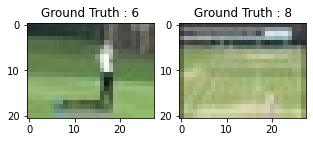

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

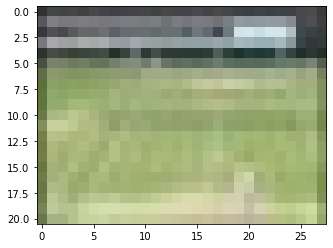

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [12]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 6
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [13]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [14]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(49361, 21, 28, 3) (12341, 21, 28, 3) (49361, 10) (12341, 10)


# Creamos el modelo de CNN

In [15]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [16]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))


sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [17]:
sport_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4928)              0         
                                                                 
 dense (Dense)               (None, 32)                157728    
                                                        

In [18]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [19]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20


2024-05-07 07:08:33.541624: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 348291216 exceeds 10% of free system memory.


772/772 [==============================] - 8s 10ms/step - loss: 2.2697 - accuracy: 0.1433 - val_loss: 2.1425 - val_accuracy: 0.3502
Epoch 2/20
772/772 [==============================] - 8s 10ms/step - loss: 2.1158 - accuracy: 0.2364 - val_loss: 1.9279 - val_accuracy: 0.4614
Epoch 3/20
772/772 [==============================] - 9s 12ms/step - loss: 1.9574 - accuracy: 0.3043 - val_loss: 1.7456 - val_accuracy: 0.5510
Epoch 4/20
772/772 [==============================] - 11s 14ms/step - loss: 1.8280 - accuracy: 0.3536 - val_loss: 1.6031 - val_accuracy: 0.5960
Epoch 5/20
772/772 [==============================] - 10s 13ms/step - loss: 1.7148 - accuracy: 0.4038 - val_loss: 1.4746 - val_accuracy: 0.6383
Epoch 6/20
772/772 [==============================] - 10s 13ms/step - loss: 1.6213 - accuracy: 0.4425 - val_loss: 1.3737 - val_accuracy: 0.6583
Epoch 7/20
772/772 [==============================] - 10s 13ms/step - loss: 1.5313 - accuracy: 0.4770 - val_loss: 1.2713 - val_accuracy: 0.6764
Epoch 

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("/home/likcos/setDocto/sport.h5")

# Evaluamos la red

In [ ]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
sport_train.history

In [ ]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes2 = sport_model.predict(test_X)

In [ ]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [ ]:
predicted_classes.shape, test_Y.shape

# Aprendamos de los errores: Qué mejorar

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [ ]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

In [ ]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['test/golf_0113.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])